In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import neccessary libraries for the project

# !pip install mysql-connector-python-rf
# !pip install mysql-connector-python
# !pip install mysqlclient
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import MySQLdb

db = MySQLdb.connect(host="127.0.0.1",    # your host, usually localhost
                     user="root",         # your username
                     passwd="prakhar",  # your password
                     db="dma_project_v2") # name of the data base

# Create a Cursor object to execute the queries
cur = db.cursor()

### Visualization 1

In [5]:
sql="Select genre,YEAR(release_date) as release_year,count(genre) as song_count \
from song s,album al \
where s.album_id=al.album_id and year(release_date) BETWEEN 2000 AND 2020 \
group by genre,YEAR(release_date)\
order by genre,YEAR(release_date);"
df = pd.read_sql(sql, db)
df.head(5)

,genre,release_year,song_count
0,blues,2000,11
1,blues,2001,18
2,blues,2002,14
3,blues,2003,16
4,blues,2004,27


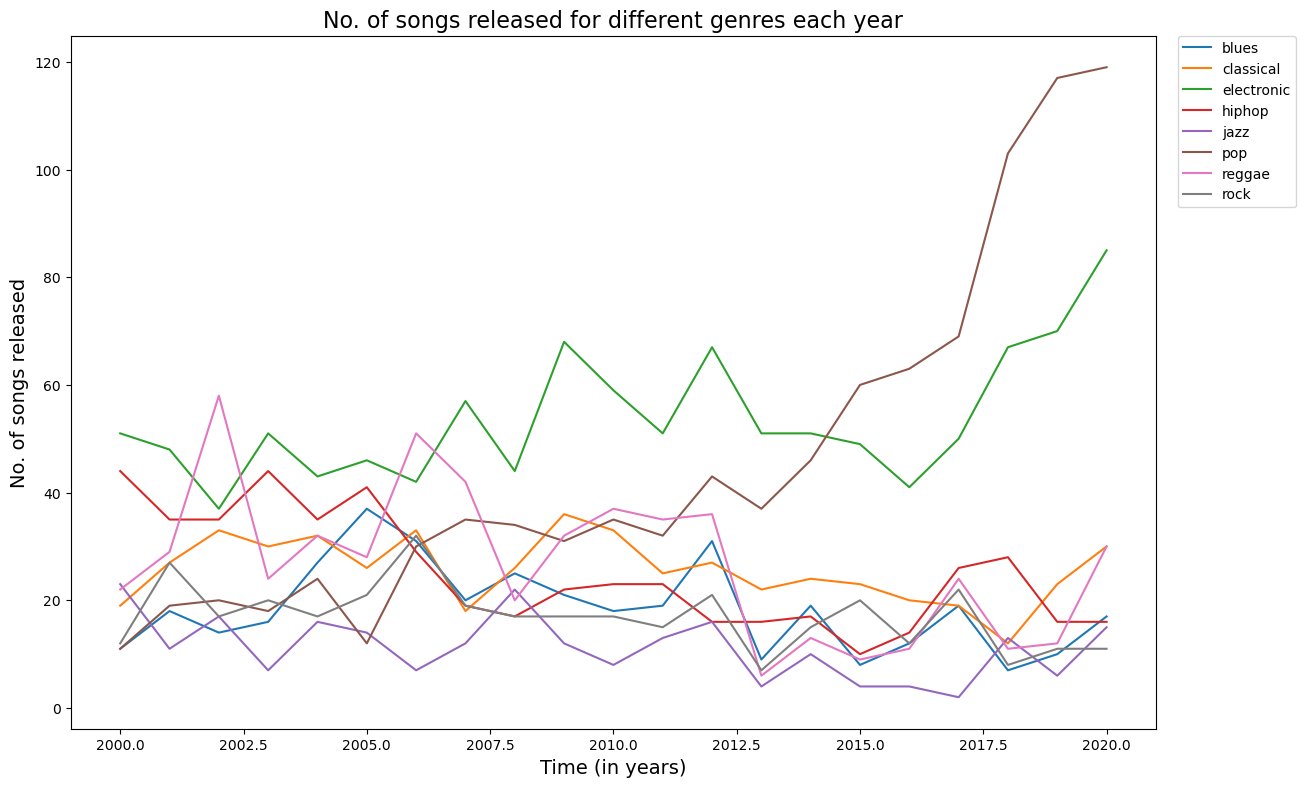

In [6]:
plt.figure(figsize = (14,9))
sns.lineplot(data = df, x = 'release_year', y = 'song_count', hue = 'genre')

plt.xlabel("Time (in years)", fontsize = 14)
plt.ylabel("No. of songs released", fontsize = 14)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('No. of songs released for different genres each year', fontsize = 16)
plt.show()

### Visualization 2

In [7]:
sql="Select genre, round(avg(danceability)*100) danceability, \
round(avg(energy)*100) energy, \
round(avg(loudness)*100) loudness, \
round(avg(speechiness)*100) speechiness, \
round(avg(acousticness)*100) acousticness, \
round(avg(instrumentalness)*100) instrumentalness, \
round(avg(liveness)*100) liveness, \
round(avg(valence)*100) valence \
from song group by genre;"
df = pd.read_sql(sql, db)
df.head(5)

,genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence
0,rock,51.0,72.0,-769.0,5.0,14.0,6.0,19.0,55.0
1,hiphop,75.0,67.0,-746.0,22.0,14.0,1.0,22.0,61.0
2,jazz,49.0,23.0,-1588.0,5.0,83.0,38.0,15.0,36.0
3,blues,58.0,49.0,-1047.0,6.0,52.0,9.0,18.0,63.0
4,electronic,68.0,71.0,-859.0,6.0,14.0,45.0,17.0,47.0


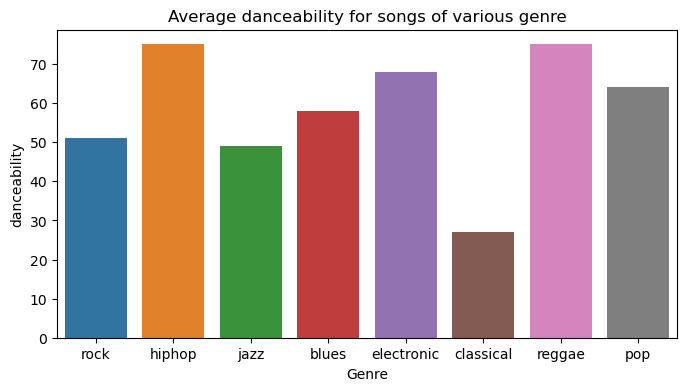

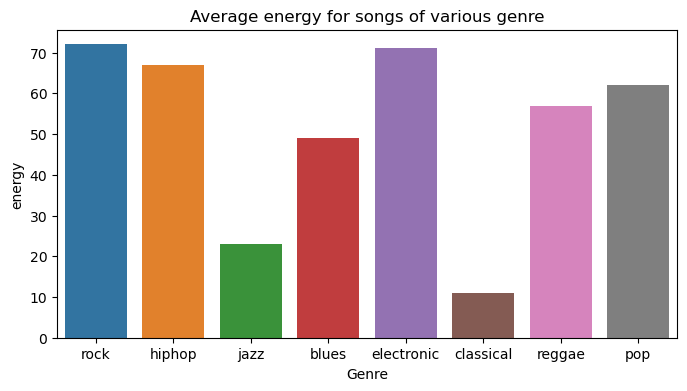

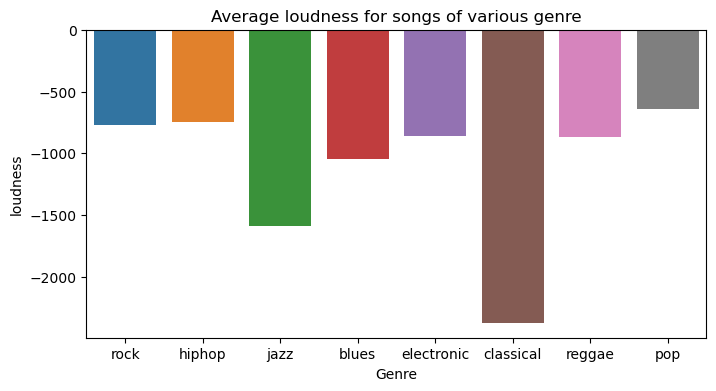

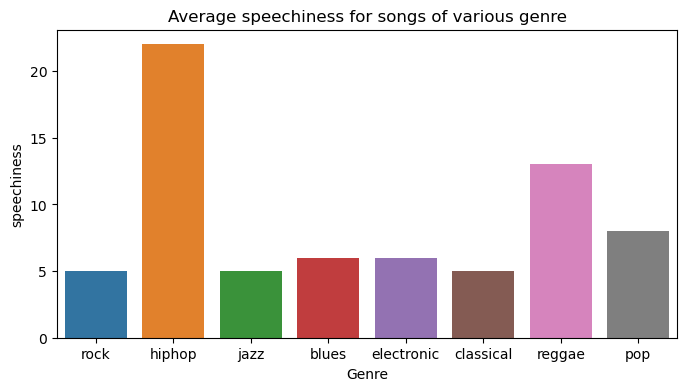

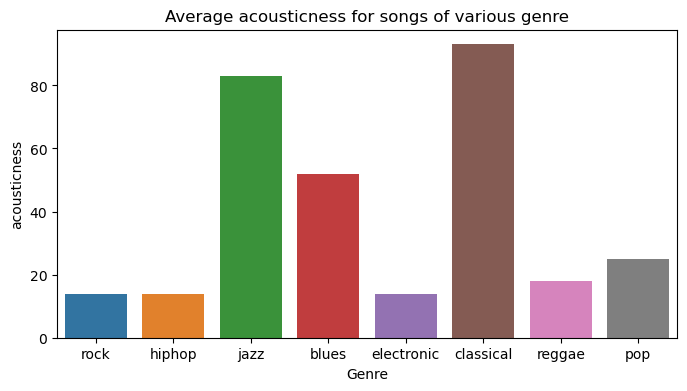

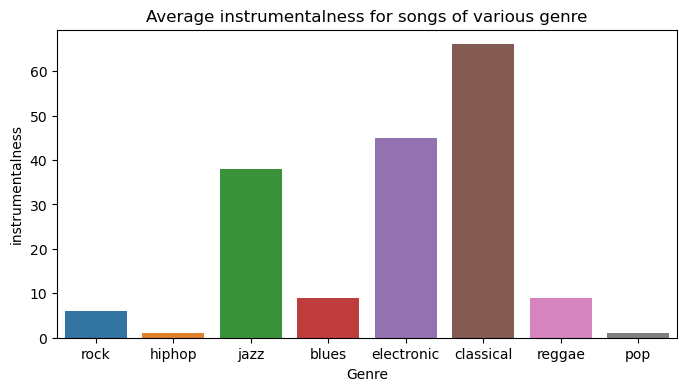

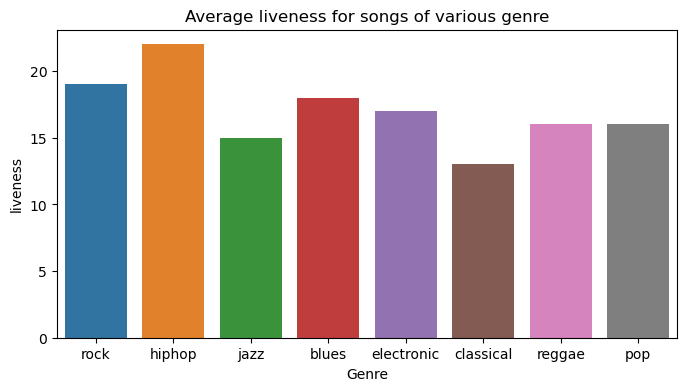

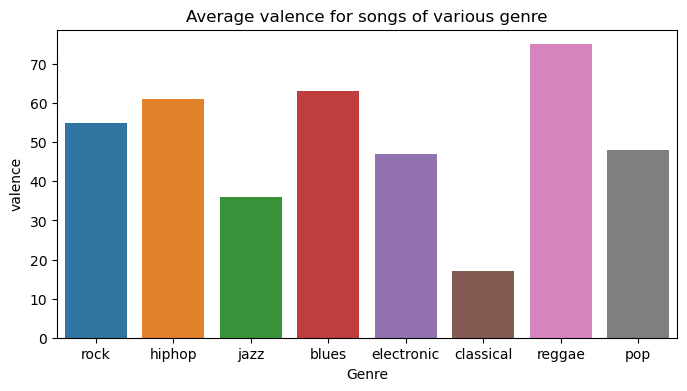

In [8]:
def graph_plot(parameter):
    plt.figure(figsize = (8,4))
    sns.barplot(data = df,
                    x = 'genre',
                    y = parameter
                )

    plt.xlabel("Genre", fontsize = 10)
    plt.title(f'Average {parameter} for songs of various genre', fontsize = 12)
    plt.show()
    
parameter_list=['danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence']

for i in range (len(parameter_list)):
    graph_plot(parameter_list[i])

### Visualization 3

In [9]:
sql = """ Select genre,YEAR(release_date) as release_year,round(avg(song_popularity)) as avg_song_popularity
from song s,album al 
where s.album_id=al.album_id and year(release_date)>2010 and year(release_date)<2021
group by genre,YEAR(release_date)
order by genre,YEAR(release_date);
"""
df = pd.read_sql(sql, db)
df

,genre,release_year,avg_song_popularity
0,blues,2011,34.0
1,blues,2012,37.0
2,blues,2013,37.0
3,blues,2014,40.0
4,blues,2015,36.0
...,...,...,...
75,rock,2016,61.0
76,rock,2017,63.0
77,rock,2018,62.0
78,rock,2019,63.0


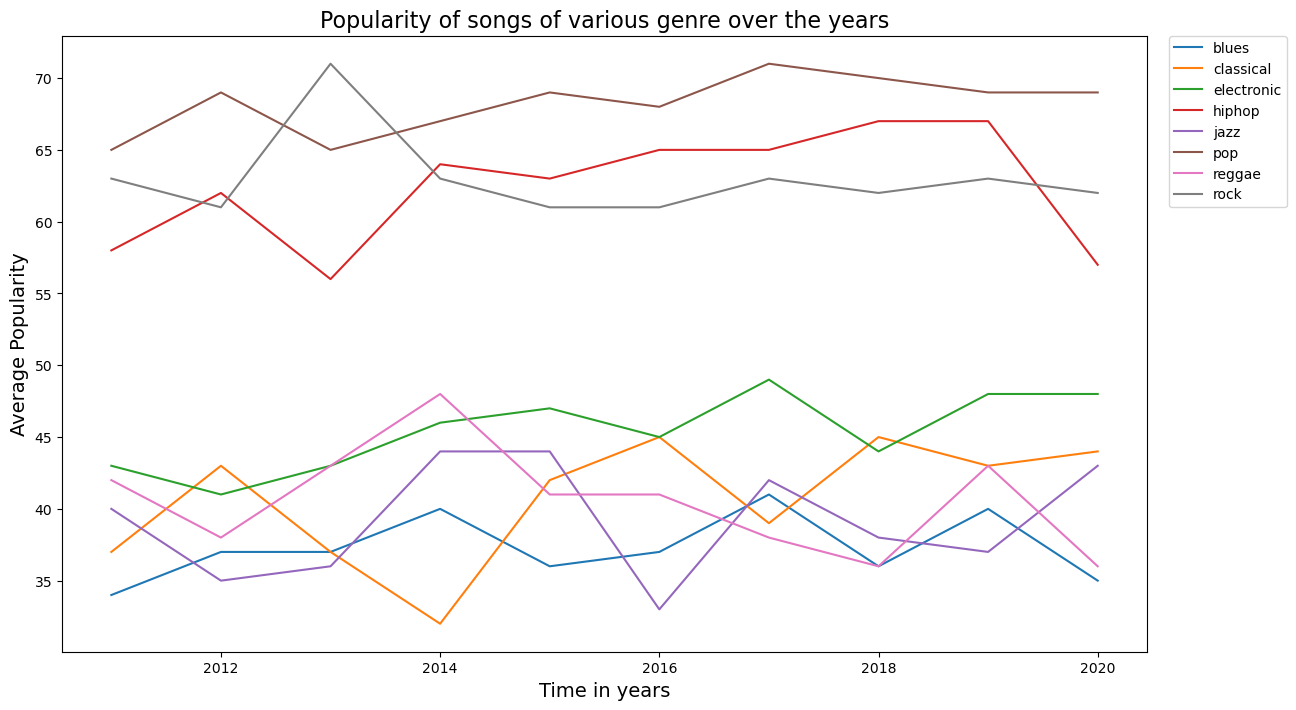

In [10]:
plt.figure(figsize = (14,8))
sns.lineplot(data = df,
                x = 'release_year',
                y = 'avg_song_popularity',
                hue = 'genre')
#                 ,style = 'Subject'
# setting labels and title for plot

plt.xlabel("Time in years", fontsize = 14)
plt.ylabel("Average Popularity", fontsize = 14)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Popularity of songs of various genre over the years', fontsize = 16)
plt.show()

### Visualization 4

In [13]:
sql = """Select genre,count(*) song_count from song group by genre;
"""
df = pd.read_sql(sql, db)
df.head(5)

,genre,song_count
0,rock,1111
1,hiphop,1024
2,jazz,1002
3,blues,1034
4,electronic,1711


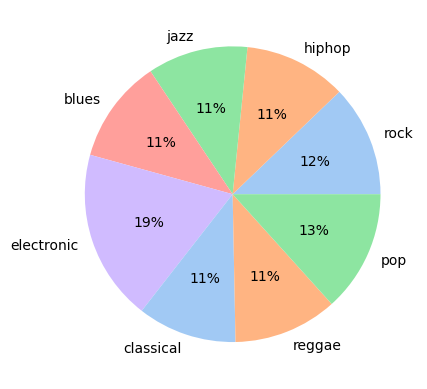

In [15]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(df["song_count"], labels = df["genre"], colors = colors, autopct='%.0f%%')
plt.show()

### Visualization 5

In [19]:
sql = """Select plan_type, count(*) as user_ratio from account group by plan_type;
"""
df = pd.read_sql(sql, db)
df.head(5)

,plan_type,user_ratio
0,premium,5015
1,free,2000


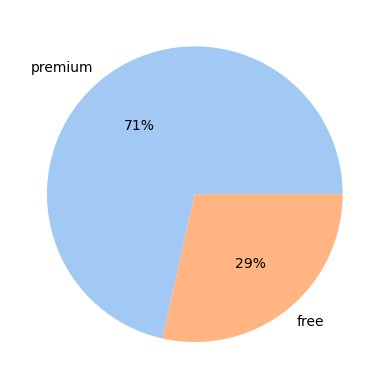

In [20]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(df["user_ratio"], labels = df["plan_type"], colors = colors, autopct='%.0f%%')
plt.show()

In [17]:
sql = """Select subscription_period, count(*) as user_ratio from premiumaccount group by subscription_period;
"""
df = pd.read_sql(sql, db)
df.head(5)

,subscription_period,user_ratio
0,monthly,300
1,yearly,4715


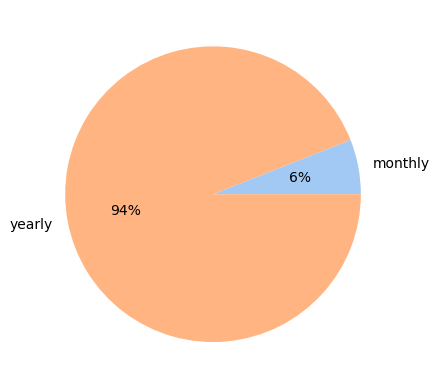

In [18]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(df["user_ratio"], labels = df["subscription_period"], colors = colors, autopct='%.0f%%')
plt.show()

### Visualization 6

In [35]:
sql = """Select country, count(*) as user_ratio from user group by country order by user_ratio DESC LIMIT 30;
"""
df = pd.read_sql(sql, db)
df.head(5)

,country,user_ratio
0,United States,2710
1,China,606
2,United Kingdom,540
3,Indonesia,309
4,France,195


<AxesSubplot:xlabel='user_ratio', ylabel='country'>

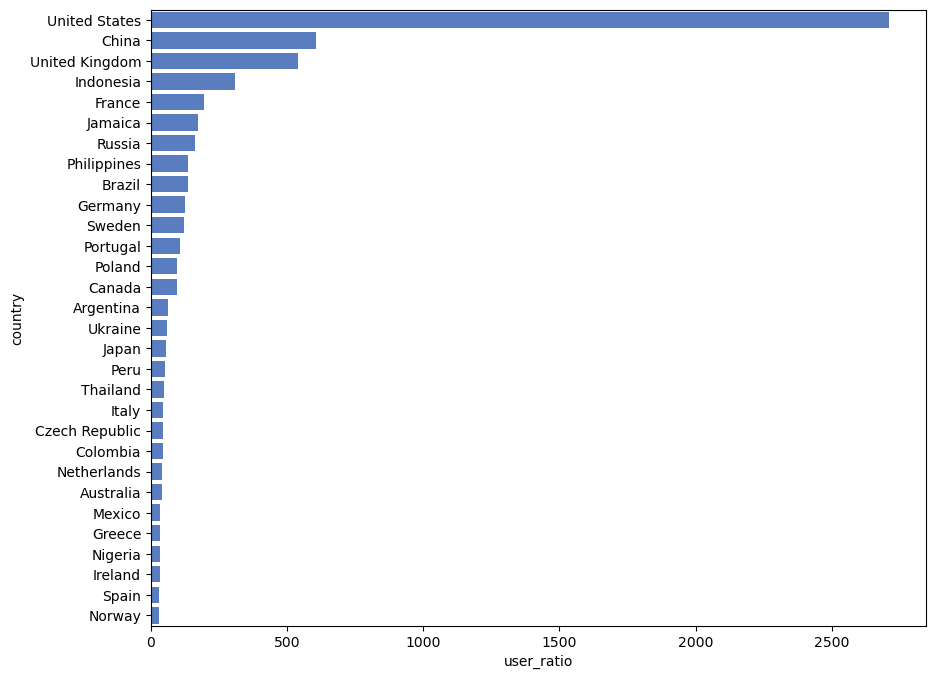

In [41]:
f, ax = plt.subplots(figsize=(10, 8))
sns.set_color_codes("muted")
sns.barplot(x=df["user_ratio"], y=df["country"], 
            label="Alcohol-involved", color="b")